In [1]:

import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
from sklearn.neural_network import MLPClassifier
import pickle
import cv2


# Just to make sure all the out puts get printed in individual jupyter cells
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

In [2]:
raw_data = pd.read_pickle("train.pickle")
raw_data_valid = pd.read_pickle("valid.pickle")
raw_data_test = pd.read_pickle("test.pickle")
classes = pd.read_csv("label_names.csv", index_col=0)
sign_list = list(classes['SignName'])
sign_dictionary = { i : sign_list[i] for i in range(43)}
raw_data.keys()
coords = raw_data['coords']
labels = raw_data['labels']
features = raw_data['features']
sizes = raw_data['sizes']


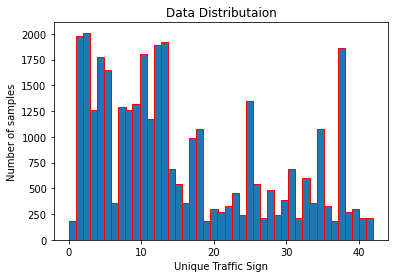

In [3]:
plt.hist(raw_data['labels'], bins=43, edgecolor='red', width=1)
plt.title('Data Distributaion')
plt.xlabel('Unique Traffic Sign')
plt.ylabel('Number of samples')
plt.show()



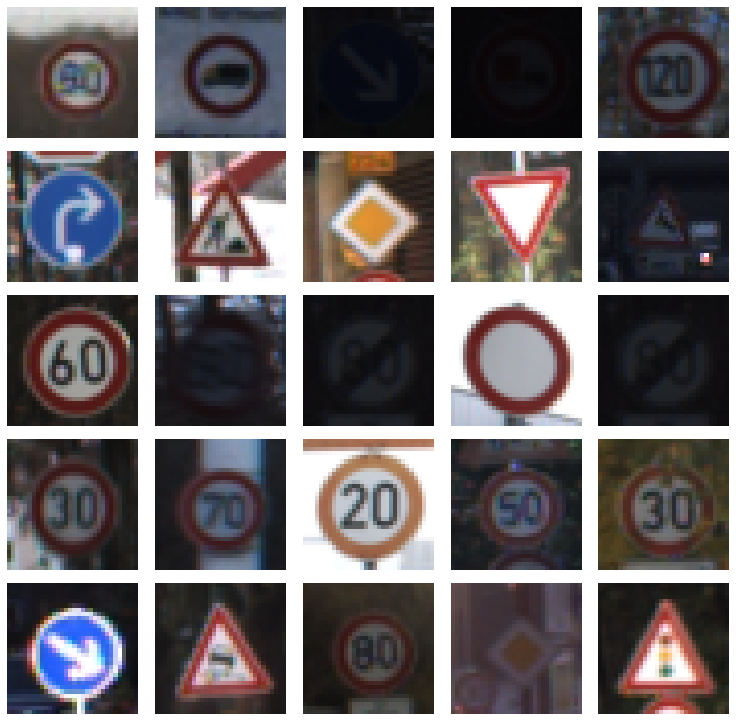

In [32]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

plt.figure(figsize = (13,13))
grid = gridspec.GridSpec(5,5)
grid.update(wspace=0.1, hspace=0.1)  

for i in range(25):
    img_plt = plt.subplot(grid[i])
    rand = random.randint(0, len(features))
    plt.imshow(features[rand])
    plt.axis('off')

plt.show()

In [5]:
y_train = []
for i in range(len(labels)) :
    tmp = [ 0 for i in range(43) ]
    tmp[labels[i]] = 1
    y_train.append(tmp)
y_train = np.array(y_train)
x_train = features
print(y_train.shape)
initialW = tf.keras.initializers.RandomUniform(minval=-1, maxval=1, seed=None)


(34799, 43)


In [10]:
y_valid = []
for i in range(len(raw_data_valid['labels'])) :
    tmp = [ 0 for i in range(43) ]
    tmp[raw_data_valid['labels'][i]] = 1
    y_valid.append(tmp)
y_valid = np.array(y_valid)
x_valid = raw_data_valid['features']
print(y_valid.shape)


(4410, 43)


In [11]:
y_test = []
for i in range(len(raw_data_test['labels'])) :
    tmp = [ 0 for i in range(43) ]
    tmp[raw_data_test['labels'][i]] = 1
    y_test.append(tmp)
y_test = np.array(y_test)
x_test = raw_data_test['features']
print(y_test.shape)

(12630, 43)


In [12]:
palette = plt.get_cmap('Set2')
plt.style.use('seaborn-darkgrid')


LETS TRY SOME MODIFICAION !!!!

In [33]:
def cvtGrey(img):
    img_grey = np.sum(img/3, axis=3, keepdims=True)
    return img_grey


x_train_grey = cvtGrey(x_train)
x_valid_grey = cvtGrey(x_valid)
x_test_grey = cvtGrey(x_test)



def normalize(img):
    img_normalized = (img - 128) / 128
    return img_normalized

x_train_normalized = normalize(x_train_grey)
x_valid_normalized = normalize(x_valid_grey)
x_test_normalized = normalize(x_test_grey)





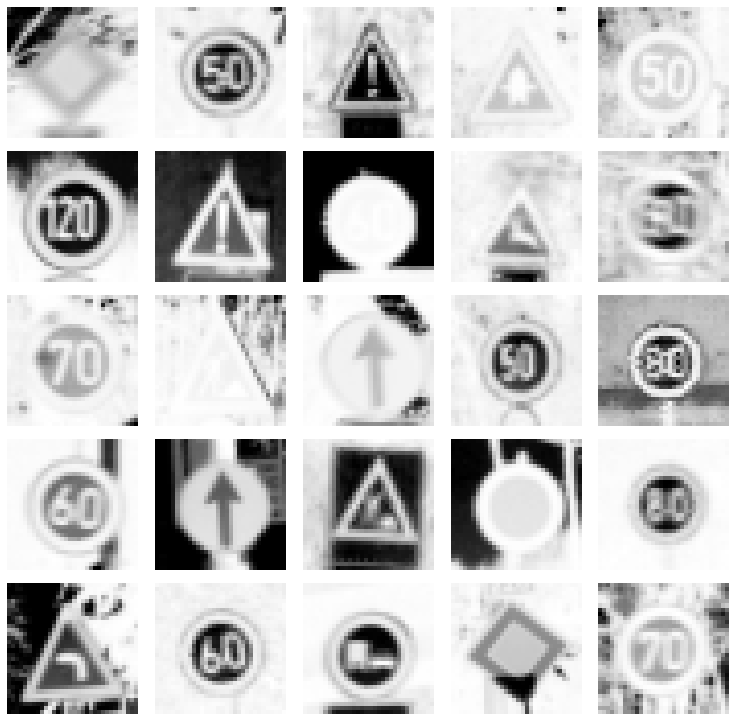

In [34]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

plt.figure(figsize = (13,13))
grid = gridspec.GridSpec(5,5)
grid.update(wspace=0.1, hspace=0.1)  

for i in range(25):
    img_plt = plt.subplot(grid[i])
    rand = random.randint(0, len(x_train_normalized))
    plt.imshow(x_train_normalized[rand])
    plt.axis('off')

plt.show()

AUGMENTING

In [15]:
x_valid_normalized.shape

(4410, 32, 32, 1)

In [17]:
from skimage import exposure

new_data_train = x_train_normalized
new_data_valid = x_valid_normalized

new_data_train = new_data_train.reshape(34799, 32, 32)
new_data_valid = new_data_valid.reshape(4410, 32, 32)


for i in range(len(new_data_train)) : 
    new_data_train[i] = exposure.equalize_hist(new_data_train[i])
new_data_train = np.array(new_data_train)

for i in range(len(new_data_valid)) :
    new_data_valid[i] = exposure.equalize_hist(new_data_valid[i])
new_data_valid = np.array(new_data_valid)

new_data_train = new_data_train.reshape(34799, 32, 32, 1)
new_data_valid = new_data_valid.reshape(4410, 32, 32, 1)
print(new_data_valid.shape, new_data_train.shape)

(4410, 32, 32, 1) (34799, 32, 32, 1)


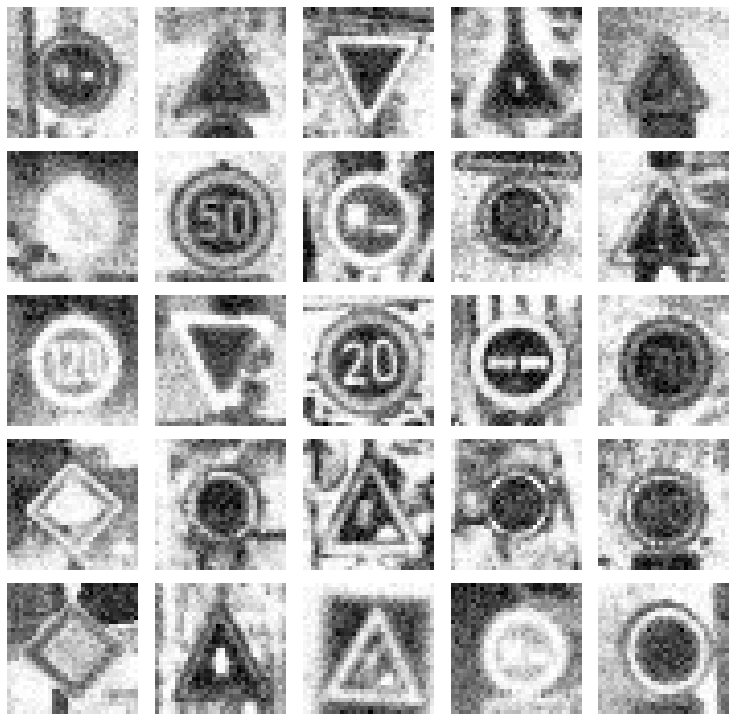

In [35]:

plt.figure(figsize = (13,13))
grid = gridspec.GridSpec(5,5)
grid.update(wspace=0.1, hspace=0.1)  

for i in range(25):
    img_plt = plt.subplot(grid[i])
    rand = random.randint(0, len(new_data_train))
    plt.imshow(new_data_train[rand])
    plt.axis('off')

plt.show()

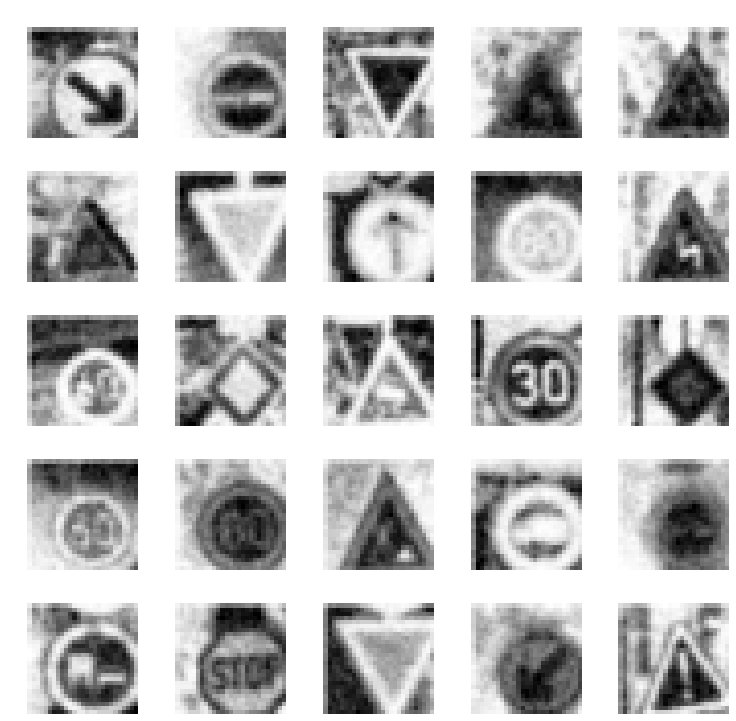

In [37]:

plt.figure(figsize = (13,13))
grid = gridspec.GridSpec(5,5)
grid.update(wspace=0.1, hspace=0.1)  

for i in range(25):
    img_plt = plt.subplot(grid[i])
    rand = random.randint(0, len(rotate_x))
    plt.imshow(rotate_x[rand])
    plt.axis('off')

plt.show()

In [19]:
new_data_train.shape
x_train.shape

(34799, 32, 32, 3)

Epoch 1/5
544/544 [==============================] - 30s 56ms/step - loss: 1.3046 - accuracy: 0.6348 - val_loss: 0.7252 - val_accuracy: 0.8159
Epoch 2/5
544/544 [==============================] - 30s 56ms/step - loss: 0.3556 - accuracy: 0.8902 - val_loss: 0.4912 - val_accuracy: 0.8687
Epoch 3/5
544/544 [==============================] - 31s 57ms/step - loss: 0.2279 - accuracy: 0.9296 - val_loss: 0.3728 - val_accuracy: 0.8923
Epoch 4/5
544/544 [==============================] - 30s 56ms/step - loss: 0.1700 - accuracy: 0.9479 - val_loss: 0.3245 - val_accuracy: 0.9068
Epoch 5/5
544/544 [==============================] - 32s 59ms/step - loss: 0.1473 - accuracy: 0.9536 - val_loss: 0.2894 - val_accuracy: 0.9091
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        320       
_________________________________________________________________

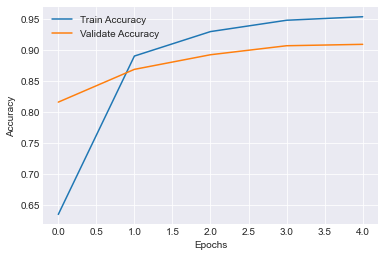

In [22]:

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
network = Sequential()


epoch_num = 5
input_shape = (32, 32, 1)

network.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1), padding='same'))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(64, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Flatten())
network.add(layers.Dropout(0.5))
network.add(layers.Dense(43, activation='softmax'))

network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = network.fit(new_data_train, y_train, validation_data=(new_data_valid, y_valid), epochs=epoch_num, batch_size=64)



plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train Accuracy', 'Validate Accuracy'], loc='upper left')


network.summary()

In [24]:
mean = 0.0   # some constant
std = 0.05    # some constant (standard deviation)

noise_x = new_data_train
noise_x_valid = new_data_valid
noise_y = y_train
noise_y_valid = y_valid

for i in range(len(new_data_train)) :
    img = new_data_train[i]
    noisy_img = img + np.random.normal(mean, std, img.shape)
    noisy_img_clipped = np.clip(noisy_img, 0, 255)  # we might get out of bounds due to noise
    noise_x[i] = noisy_img_clipped

for i in range(len(new_data_valid)) :
    img = new_data_valid[i]
    noisy_img = img + np.random.normal(mean, std, img.shape)
    noisy_img_clipped = np.clip(noisy_img, 0, 255)  
    noise_x_valid[i] = noisy_img_clipped




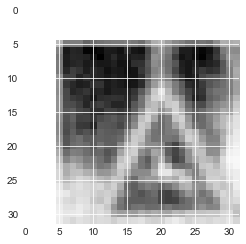

In [26]:
from copy import deepcopy
rotate_x = deepcopy(new_data_train)
rotate_x_valid = deepcopy(new_data_valid)


for i in range(len(rotate_x)) :
    
    image = new_data_train[i]
    height, width = image.shape[:2] 
    quarter_height, quarter_width = height / 6, width / 6
    T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]]) 
    img_translation = cv2.warpAffine(image, T, (width, height)) 
    rotate_x[i] = img_translation.reshape(32, 32, 1)

for i in range(len(rotate_x_valid)) :
    
    image = new_data_valid[i]
    height, width = image.shape[:2] 
    quarter_height, quarter_width = height / 6, width / 6
    T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]]) 
    img_translation = cv2.warpAffine(image, T, (width, height)) 
    rotate_x_valid[i] = img_translation.reshape(32, 32, 1)

rotate_x.shape, rotate_x_valid.shape
plt.imshow(rotate_x[432])


ADDING ALL THE DATA TOGHETER

In [30]:
final_x_train = np.concatenate((noise_x, rotate_x, x_train_normalized), axis=0)
final_y_train = np.concatenate((noise_y, noise_y, noise_y), axis=0)
final_x_valid = np.concatenate((noise_x_valid, rotate_x_valid, x_valid_normalized), axis=0)
final_y_valid = np.concatenate((y_valid, y_valid, y_valid), axis=0)


print(final_x_train.shape, final_y_train.shape)
print(final_x_valid.shape, final_y_valid.shape)

(104397, 32, 32, 1) (104397, 43)
(13230, 32, 32, 1) (13230, 43)


Epoch 1/5
1632/1632 [==============================] - 103s 63ms/step - loss: 1.1588 - accuracy: 0.6672 - val_loss: 0.7282 - val_accuracy: 0.8253
Epoch 2/5
1632/1632 [==============================] - 101s 62ms/step - loss: 0.4749 - accuracy: 0.8513 - val_loss: 0.5126 - val_accuracy: 0.8678
Epoch 3/5
1632/1632 [==============================] - 102s 63ms/step - loss: 0.3717 - accuracy: 0.8827 - val_loss: 0.4303 - val_accuracy: 0.8878
Epoch 4/5
1632/1632 [==============================] - 107s 66ms/step - loss: 0.3214 - accuracy: 0.8969 - val_loss: 0.4070 - val_accuracy: 0.8952
Epoch 5/5
1632/1632 [==============================] - 103s 63ms/step - loss: 0.2836 - accuracy: 0.9083 - val_loss: 0.3498 - val_accuracy: 0.9076
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        320       
__________________________________________________

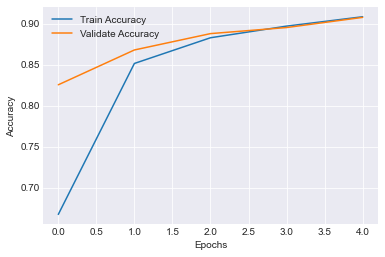

In [31]:

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
network = Sequential()


epoch_num = 5
input_shape = (32, 32, 3)

network.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1), padding='same'))
network.add(layers.Dropout(0.25))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(64, (3, 3), activation='relu'))
network.add(layers.Dropout(0.25))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Flatten())
network.add(layers.Dropout(0.5))
network.add(layers.Dense(43, activation='softmax'))

network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = network.fit(final_x_train, final_y_train, validation_data=(final_x_valid, final_y_valid), epochs=epoch_num, batch_size=64)


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train Accuracy', 'Validate Accuracy'], loc='upper left')


network.summary()

In [41]:
weights = network.get_weights()

import pickle
try:
    fpkl= open('weights', 'wb')    #Python 3     
    pickle.dump(weights, fpkl, protocol= pickle.HIGHEST_PROTOCOL)
    fpkl.close()
except:
    fpkl= open('weights', 'w')    #Python 2      
    pickle.dump(weights, fpkl, protocol= pickle.HIGHEST_PROTOCOL)
    fpkl.close()